# XGBoost Basis

In [2]:
import pandas as pd
import xgboost as xgb
from sklearn.metrics import classification_report

### Test alt - bitte nicht durchlaufen lassen, erst ab nächster Überschrift

In [2]:
# 📥 1. Daten einlesen
train = pd.read_csv("Data/preprocessed/train_preprocessed.csv")         # Trainingsdaten mit Zielspalte
test = pd.read_csv("Data/preprocessed/test_preprocessed.csv")        # Testdaten ohne Zielspalte
target = pd.read_csv("Data/preprocessed/test_target.csv")  # Testzielwerte mit AdoptionSpeed + PetID

# 🧹 2. Features & Ziel trennen
X_train = train.drop(columns=["AdoptionSpeed", "PetID"])
y_train = train["AdoptionSpeed"]

X_test = test.drop(columns=["PetID"])
y_test = target["AdoptionSpeed"]  # Zielwerte für Test (optional)

# 🧠 3. XGBoost-Modell mit Defaultparametern + reproduzierbarem Seed
model = xgb.XGBClassifier(
    objective="multi:softprob",
    num_class=5,
    use_label_encoder=False,
    eval_metric="mlogloss",
    random_state=42
)

# 🚀 4. Training
model.fit(X_train, y_train)

# 🔍 5. Vorhersage auf Testdaten
y_pred = model.predict(X_test)

# 📊 6. Evaluation (falls Zielwerte vorhanden)
print(classification_report(y_test, y_pred))

# 🧾 7. Ergebnis zusammenführen (optional)
result_df = pd.DataFrame({
    "PetID": test["PetID"],
    "AdoptionSpeed_Pred": y_pred,
    "AdoptionSpeed_True": y_test.values
})

# 💾 8. Optional: Submission speichern
submission = pd.DataFrame({
    "PetID": test["PetID"],
    "AdoptionSpeed": y_pred
})
submission.to_csv("submission.csv", index=False)


c:\Users\faulh\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [10:16:02] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.52      0.51      0.51       684
           1       0.32      0.30      0.31       448
           2       0.33      0.33      0.33       628
           3       0.34      0.25      0.29       464
           4       0.46      0.57      0.51       621

    accuracy                           0.41      2845
   macro avg       0.39      0.39      0.39      2845
weighted avg       0.40      0.41      0.40      2845



In [3]:
print(y_test.value_counts())


0    684
2    628
4    621
3    464
1    448
Name: AdoptionSpeed, dtype: int64


In [4]:
target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845 entries, 0 to 2844
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   PetID          2845 non-null   object
 1   AdoptionSpeed  2845 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 44.6+ KB


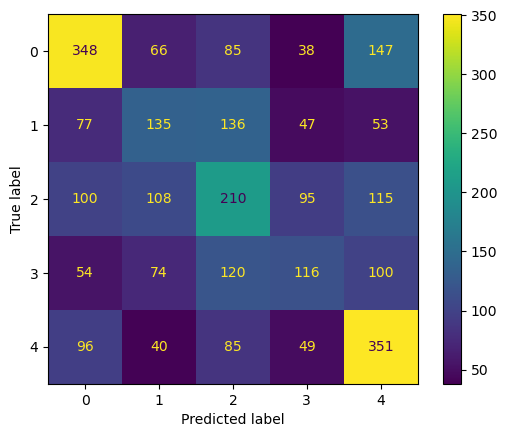

In [5]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import pandas as pd

# Confusion Matrix berechnen
cm = confusion_matrix(y_test, y_pred, labels=[0, 1, 2, 3, 4])

# Anzeige
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1, 2, 3, 4])
disp.plot()
#

In [14]:
print(y_train.value_counts())


4    4197
2    4037
3    3259
1    3090
0     410
Name: AdoptionSpeed, dtype: int64


### Test mit neuem df

Dummy Accuracy: 0.24042179261862917

Dummy Classification Report:
               precision    recall  f1-score   support

           0       0.24      1.00      0.39       684
           1       0.00      0.00      0.00      1540
           2       0.00      0.00      0.00       621

    accuracy                           0.24      2845
   macro avg       0.08      0.33      0.13      2845
weighted avg       0.06      0.24      0.09      2845

[0]	validation_0-mlogloss:1.06097
[1]	validation_0-mlogloss:1.03666
[2]	validation_0-mlogloss:1.01757
[3]	validation_0-mlogloss:1.00412
[4]	validation_0-mlogloss:0.99193


c:\Users\faulh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\faulh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\faulh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\faulh\anaconda3\Lib\site-packages\xgboost\trai

[5]	validation_0-mlogloss:0.98122
[6]	validation_0-mlogloss:0.97419
[7]	validation_0-mlogloss:0.96665
[8]	validation_0-mlogloss:0.95924
[9]	validation_0-mlogloss:0.94882
[10]	validation_0-mlogloss:0.94162
[11]	validation_0-mlogloss:0.94032
[12]	validation_0-mlogloss:0.93795
[13]	validation_0-mlogloss:0.93498
[14]	validation_0-mlogloss:0.93474
[15]	validation_0-mlogloss:0.93455
[16]	validation_0-mlogloss:0.92957
[17]	validation_0-mlogloss:0.92783
[18]	validation_0-mlogloss:0.92619
[19]	validation_0-mlogloss:0.92153
[20]	validation_0-mlogloss:0.92080
[21]	validation_0-mlogloss:0.91793
[22]	validation_0-mlogloss:0.91807
[23]	validation_0-mlogloss:0.92043
[24]	validation_0-mlogloss:0.92003
[25]	validation_0-mlogloss:0.91866
[26]	validation_0-mlogloss:0.92153
[27]	validation_0-mlogloss:0.92128
[28]	validation_0-mlogloss:0.91998
[29]	validation_0-mlogloss:0.91893
[30]	validation_0-mlogloss:0.92050
[31]	validation_0-mlogloss:0.91786
[32]	validation_0-mlogloss:0.91581
[33]	validation_0-mloglos

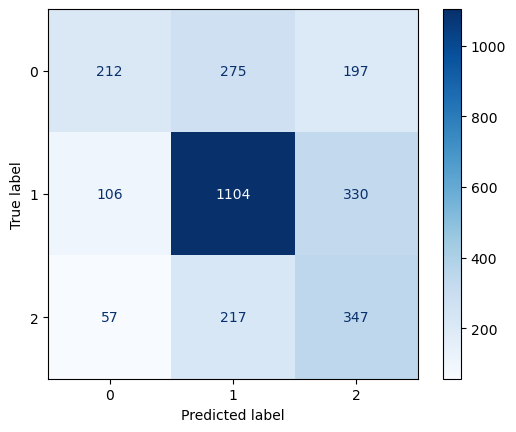

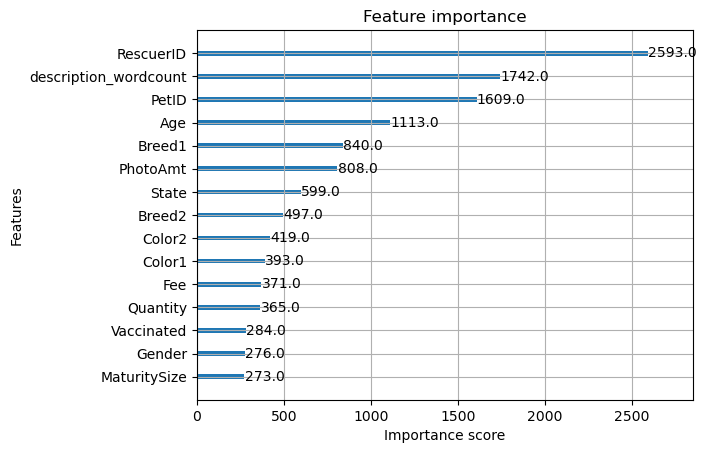

In [ ]:
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import numpy as np

train_df = pd.read_csv("Data/preprocessed/train_preprocessed.csv")

# --- 1. Features & Ziel ---
# Angenommen du hast: train_df, valid_df, test_df
X_train = train_df.drop(columns=['AdoptionSpeed'])
y_train = train_df['AdoptionSpeed']

X_valid = pd.read_csv("Data/preprocessed/valid_preprocessed.csv")
y_valid = pd.read_csv("Data/preprocessed/valid_target.csv")['AdoptionSpeed']

X_test = pd.read_csv("Data/preprocessed/test_preprocessed.csv")
y_test = pd.read_csv("Data/preprocessed/test_target.csv")['AdoptionSpeed']

from sklearn.preprocessing import OrdinalEncoder

# Kategorische Spalten ermitteln
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns

# Encoder erstellen
oe = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

# Fit auf Trainingsdaten
X_train[cat_cols] = oe.fit_transform(X_train[cat_cols])
X_valid[cat_cols] = oe.transform(X_valid[cat_cols])
X_test[cat_cols] = oe.transform(X_test[cat_cols])


# --- 2. Label Encoding für alle kategorischen Spalten ---
for col in X_train.select_dtypes(include=['category', 'object']).columns:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])
    
    # Transformiere valid und test mit den gleichen Encodern
    X_valid[col] = le.transform(X_valid[col])
    X_test[col] = le.transform(X_test[col])

# --- 3. XGBoost Modell ---
xgb = XGBClassifier(
    objective="multi:softmax",
    eval_metric="mlogloss",
    use_label_encoder=False,
    random_state=42
)
xgb.fit(X_train, y_train, eval_set=[(X_valid, y_valid)], verbose=True)

# --- 4. Vorhersagen auf Testset ---
y_pred = xgb.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# --- 5. Confusion Matrix ---
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_train))
disp.plot(cmap="Blues")


### Test mit Oversampling

Trainiere XGBoost mit Default-Werten auf den vorverarbeiteten Daten...
[0]	validation_0-mlogloss:1.05385
[1]	validation_0-mlogloss:1.02513
[2]	validation_0-mlogloss:1.00876
[3]	validation_0-mlogloss:0.99505
[4]	validation_0-mlogloss:0.98092
[5]	validation_0-mlogloss:0.97235
[6]	validation_0-mlogloss:0.96223
[7]	validation_0-mlogloss:0.95419
[8]	validation_0-mlogloss:0.94630
[9]	validation_0-mlogloss:0.94142
[10]	validation_0-mlogloss:0.93691
[11]	validation_0-mlogloss:0.93290
[12]	validation_0-mlogloss:0.93160
[13]	validation_0-mlogloss:0.93024
[14]	validation_0-mlogloss:0.92610
[15]	validation_0-mlogloss:0.92581
[16]	validation_0-mlogloss:0.92623
[17]	validation_0-mlogloss:0.92388
[18]	validation_0-mlogloss:0.92229
[19]	validation_0-mlogloss:0.92114
[20]	validation_0-mlogloss:0.92126
[21]	validation_0-mlogloss:0.91872
[22]	validation_0-mlogloss:0.91725
[23]	validation_0-mlogloss:0.91773
[24]	validation_0-mlogloss:0.91804
[25]	validation_0-mlogloss:0.91654
[26]	validation_0-mlogloss:0.

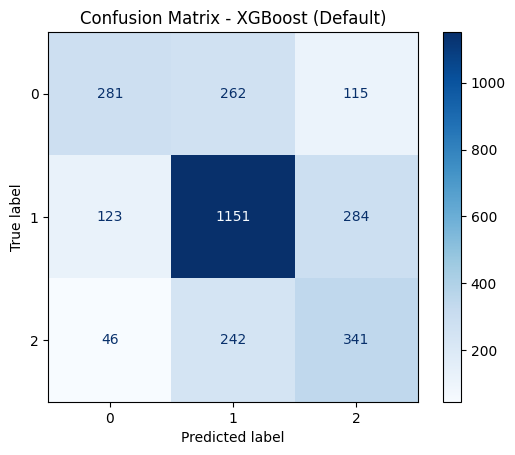

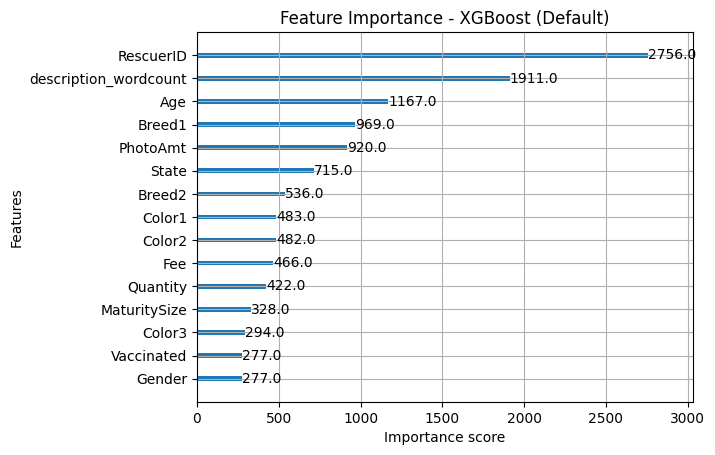

In [3]:
# === 0. Imports ===
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from xgboost import XGBClassifier, plot_importance
import matplotlib.pyplot as plt

# === 1. Bereits vorverarbeitete Daten laden ===
X_train_res = pd.read_csv("Data/final/X_train_res.csv")
y_train_res = pd.read_csv("Data/final/y_train_res.csv")
X_valid_enc = pd.read_csv("Data/final/X_valid_enc.csv")
X_test_enc = pd.read_csv("Data/final/X_test_enc.csv")
y_valid = pd.read_csv("Data/final/y_valid.csv")
y_test = pd.read_csv("Data/final/y_test.csv")

# Sicherstellen, dass y-Daten die richtige Form haben
y_train_res = y_train_res.squeeze()  # Konvertiert DataFrame zu Series
y_valid = y_valid.squeeze()
y_test = y_test.squeeze()

# PetID für spätere Analyse extrahieren und aus Features entfernen
valid_ids = X_valid_enc['PetID']
test_ids = X_test_enc['PetID']

X_valid = X_valid_enc.drop(columns=['PetID'])
X_test = X_test_enc.drop(columns=['PetID'])

# === 2. XGBoost Modell MIT DEFAULT WERTEN ===
print("Trainiere XGBoost mit Default-Werten auf den vorverarbeiteten Daten...")

xgb = XGBClassifier(
    random_state=42,
    eval_metric='mlogloss',
    verbosity=1
)

xgb.fit(X_train_res, y_train_res, 
        eval_set=[(X_valid, y_valid)], 
        verbose=True)

# === 3. Vorhersagen und Evaluation ===
y_pred = xgb.predict(X_test)

print("\n=== XGBOOST ERGEBNISSE ===")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# === 4. Confusion Matrix ===
labels_all = [0, 1, 2]
cm = confusion_matrix(y_test, y_pred, labels=labels_all)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels_all)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - XGBoost (Default)")
plt.show()

# === 5. Feature Importance ===
plot_importance(xgb, importance_type="weight", max_num_features=15)
plt.title("Feature Importance - XGBoost (Default)")
plt.show()
